<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/Introduction_to_neural_network_classification_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to the neural network classification with  the  Tendorflowo
In this notebook we're going to learn how to erite a neural network for the classification problems

A classification is where you try to classify something as one of the thing or anotherthing

A few types if the Classification

*Binary Classificatioin

*Multiclass Classification

*Multilabel Classificatioin


#Creating Data to view & fit

In [92]:
from sklearn.datasets import make_circles
#make the 100 examples
n_samples=1000
#create circles
x,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)


In [93]:
#Check out the features
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [94]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [95]:
import pandas as pd
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


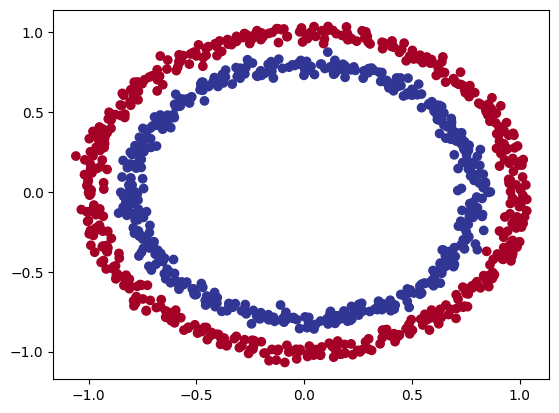

In [96]:
#visualize as a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

##Input and Output Shape

In [97]:
#Checking the shpaes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [98]:
#no. of samples
len(x), len(y)

(1000, 1000)

In [99]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in Modeling

The steps in modeling with tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweek the model
6. Evaluate

In [100]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [101]:

tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4674 - loss: 3.9580   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4983 - loss: 0.7899
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5026 - loss: 0.7207 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4961 - loss: 0.7038 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4942 - loss: 0.6982 


In [102]:
##Improving the model by training for longer
model_1.fit(x,y,epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy.. it's performing as if it guessing.

So, let's step things up a notch and add an extra layer




In [103]:


tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x,y,epochs=100, verbose=0)

model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5045 - loss: 7.8989  


[7.971191883087158, 0.5]

In [104]:
model_2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5045 - loss: 7.8989 


[7.971191883087158, 0.5]

##Improving our model


Adding the more  layers & increaes the layers of the hidden units

Using the different optimization function such as Adam

We also can fit more epochs for our model


In [105]:

tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x,y,epochs=100, verbose=0)


In [106]:
model_3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5139 - loss: 0.6915  


[0.6953596472740173, 0.492000013589859]

#Let's us create another model

In [107]:
tf.random.set_seed(42)
x_regression=tf.range(0,1000, 5)
y_regression=tf.range(100,1100,5)

x_reg_train=x_regression[:150]
x_reg_test=x_regression[150:]


y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


# x_regression, y_regression
x_reg_train.shape, x_reg_test.shape


(TensorShape([150]), TensorShape([50]))

In [108]:

tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_4.fit(tf.expand_dims(x_reg_train, axis=1),y_reg_train,epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 524.6490 - mae: 524.6490  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 428.9351 - mae: 428.9351 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 332.2716 - mae: 332.2716 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 232.5028 - mae: 232.5028 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 127.9601 - mae: 127.9601 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.4230 - mae: 44.4230 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.7086 - mae: 74.7086 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.4311 - mae: 70.4311 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.5942 - mae: 46.5942 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.8296 - mae: 46.8296 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.1918 - mae: 41.1918 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.6041 - mae: 42.6041 
Epoch 13/100
5

In [109]:
model_4.evaluate(x_reg_test,y_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 58.9926 - mae: 58.9926 


[61.62553787231445, 61.62553787231445]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


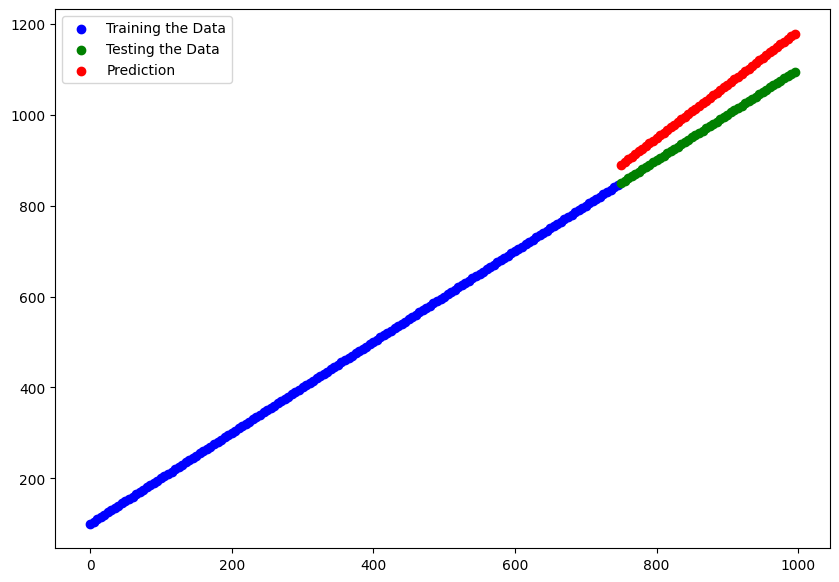

In [110]:
#making the predictioin with our trained model
y_reg_pred=model_4.predict(x_reg_test)
y_reg_pred

#plot the model's prediction against our regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training the Data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing the Data")
plt.scatter(x_reg_test, y_reg_pred, c="r", label="Prediction")
plt.legend()

#The Missing Piece: Non-linearity part

In [111]:

tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_5.fit(x, y,epochs=100)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4670 - loss: 6.0922
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4653 - loss: 5.9447
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4628 - loss: 5.9072
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4600 - loss: 5.8065  
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4600 - loss: 5.7628 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4627 - loss: 5.6825 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4627 - loss: 5.6497 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4610 - loss: 5.6462 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4610 - loss: 5.6357 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4572 - loss: 5.4771 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4580 - loss: 5.3514 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

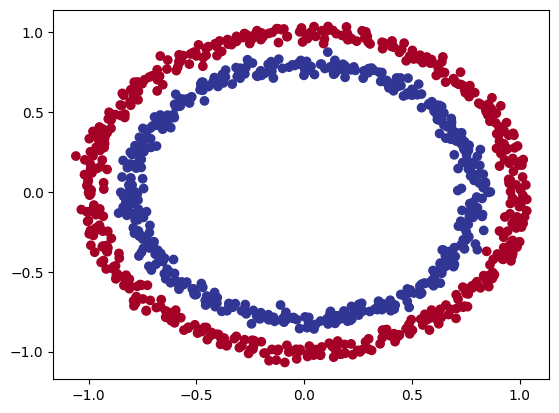

In [112]:
#checking our data
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [113]:
# #checking the decision boundary
# plot_decision_boundary(model=model_5,
#                        x=x,
#                        y=y)

#Building the first neural network with the non-linear activation function

In [114]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),

])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_6.fit(x,y,epochs=100, verbose=1)



Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4332 - loss: 4.8339
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4334 - loss: 4.8175
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4303 - loss: 4.7964 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4325 - loss: 4.7797 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4325 - loss: 4.7783 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4329 - loss: 4.7775 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4329 - loss: 4.7768 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4331 - loss: 4.7761 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4331 - loss: 4.7754 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4331 - loss: 4.7721 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4339 - loss: 4.7513 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [115]:
model_6.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4670 - loss: 0.7746  


[0.7875412106513977, 0.453000009059906]

In [128]:
#time to replicate the multi layer neural network from the tensorflow playground

tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


history = model_7.fit(x, y, epochs=250, verbose=1)

# x.shape, y.shape

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5169 - loss: 0.7283   
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5198 - loss: 0.7190 
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4863 - loss: 0.7137 
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4563 - loss: 0.7103 
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 0.7078 
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4716 - loss: 0.7060 
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4536 - loss: 0.7047 
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4363 - loss: 0.7038 
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4218 - loss: 0.7029 
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4239 - loss: 0.7022 
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4356 - loss: 0.7016 
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [129]:
model_7.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8820 - loss: 0.3653  


[0.38022103905677795, 0.8690000176429749]